In [36]:
# Import Libraries
import pandas as pd
import numpy as np
import operator
import sys
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.patches as mpatches
import seaborn as sns
import plotly
import plotly.express as px

In [37]:
# Companies description
desc_df = pd.read_csv('../notebooks/content/constituents.csv')
print('\nCompanies Details')
print(desc_df.head())

# stocks details
stocks_df = pd.read_csv('../notebooks/content/stocks_data/all_stocks_5yr.csv')#, parse_dates=['date'])
print('\nCompanies Stocks')
print(stocks_df.head())


Companies Details
  Symbol                 Name                  Sector
0    MMM           3M Company             Industrials
1    AOS      A.O. Smith Corp             Industrials
2    ABT  Abbott Laboratories             Health Care
3   ABBV          AbbVie Inc.             Health Care
4    ACN        Accenture plc  Information Technology

Companies Stocks
         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [39]:
# dicitonary for companies name and sector
companies_names = {symbol:name for symbol, name in desc_df[['Symbol', 'Name']].values}
companies_sector = {symbol:sector for symbol, sector in desc_df[['Symbol', 'Sector']].values}

# get all companies symbols
symbols = stocks_df['Name'].values
dates = set(stocks_df['date'].values)
dates = sorted(dates)

# store each individual date and all it's stocks
dates_dictionary = {date:{} for date in dates}

In [60]:
dates_dictionary

{'2013-02-08': {},
 '2013-02-11': {},
 '2013-02-12': {},
 '2013-02-13': {},
 '2013-02-14': {},
 '2013-02-15': {},
 '2013-02-19': {},
 '2013-02-20': {},
 '2013-02-21': {},
 '2013-02-22': {},
 '2013-02-25': {},
 '2013-02-26': {},
 '2013-02-27': {},
 '2013-02-28': {},
 '2013-03-01': {},
 '2013-03-04': {},
 '2013-03-05': {},
 '2013-03-06': {},
 '2013-03-07': {},
 '2013-03-08': {},
 '2013-03-11': {},
 '2013-03-12': {},
 '2013-03-13': {},
 '2013-03-14': {},
 '2013-03-15': {},
 '2013-03-18': {},
 '2013-03-19': {},
 '2013-03-20': {},
 '2013-03-21': {},
 '2013-03-22': {},
 '2013-03-25': {},
 '2013-03-26': {},
 '2013-03-27': {},
 '2013-03-28': {},
 '2013-04-01': {},
 '2013-04-02': {},
 '2013-04-03': {},
 '2013-04-04': {},
 '2013-04-05': {},
 '2013-04-08': {},
 '2013-04-09': {},
 '2013-04-10': {},
 '2013-04-11': {},
 '2013-04-12': {},
 '2013-04-15': {},
 '2013-04-16': {},
 '2013-04-17': {},
 '2013-04-18': {},
 '2013-04-19': {},
 '2013-04-22': {},
 '2013-04-23': {},
 '2013-04-24': {},
 '2013-04-25

In [40]:
wv = KeyedVectors.load("wordvectors.kv", mmap='r')
wv['REGN']

array([ 1.0451902 , -1.0075372 , -0.09031089,  1.6944635 ,  1.7451745 ,
       -0.70290536, -0.18981558,  0.09384643, -2.7022476 ,  1.5046965 ],
      dtype=float32)

In [41]:
binary_vectors = 'stock2vec_Keyed_Binary.bin'
text_vectors = 'stock2vec_Keyed_Text.vec'

model = KeyedVectors.load_word2vec_format(text_vectors, binary=False)
word_dict = {}
embeddings = []
for word in model.vocab:
    word_dict[word] = model[word]
    #embeddings.append(model2[word])

for key in word_dict:
    embeddings.append(word_dict[key])
#embeddings
len(word_dict)

505

In [27]:
word_dict["REGN"]

array([ 0.00912339, -0.38708624, -1.6821027 ,  3.8626719 ], dtype=float32)

In [28]:
# Load Vectors

binary_vectors = 'stock2vec_Keyed_Binary.bin'
text_vectors = 'stock2vec_Keyed_Text.vec'

model = KeyedVectors.load_word2vec_format(binary_vectors, binary=True)
word_dict = {}
for word in model.vocab:
    word_dict[word] = model[word]
#save_pkl(word_dict, out_path, overwrite=True) 
model

In [42]:
words = list(model.wv.vocab)
X = model[model.wv.vocab]
X

<ipython-input-42-6be01e7da47b>:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

<ipython-input-42-6be01e7da47b>:2: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



array([[-0.14497213, -0.45860606, -1.1782019 , -1.1941084 ],
       [ 0.7040044 , -1.1718557 , -0.2739038 ,  1.0556908 ],
       [-0.15832463, -0.7564409 , -1.0549943 , -0.7916976 ],
       ...,
       [ 0.5649781 ,  0.12315261, -0.9708491 ,  0.56072503],
       [ 0.628613  , -0.09328333, -0.77231306, -0.04612734],
       [ 0.605424  , -0.09975752, -0.82908016,  0.04775446]],
      dtype=float32)

In [43]:
words = list(model.wv.vocab)
X = model[model.wv.vocab]


pca = PCA(n_components=4)

result = pca.fit_transform(X)

sectors = ['Industrials' ,'Health Care' ,'Information Technology' ,'Utilities','Financials','Materials', 
                     'Consumer Discretionary','Real Estate', 'Consumer Staples','Energy',
                     'Telecommunication Services']

<ipython-input-43-9f26541f58c6>:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

<ipython-input-43-9f26541f58c6>:2: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



In [44]:
target_symb = 'ALXN'

print('Symbol:%s\tName:%s\tSector: %s'%(target_symb, companies_names[target_symb], companies_sector[target_symb]))
top_similar = model.similar_by_word(target_symb, topn=20)
#top_similar = model.similar_by_vector(target_symb, topn=20)
print('Most Similar')
for similar in top_similar:
  symb = similar[0]
  name = companies_names[symb]
  sect = companies_sector[symb]
  print('Symbol: %s\tName: %s\t\t\tSector: %s'%(symb, name, sect))

Symbol:ALXN	Name:Alexion Pharmaceuticals	Sector: Health Care
Most Similar
Symbol: REGN	Name: Regeneron			Sector: Health Care
Symbol: VRTX	Name: Vertex Pharmaceuticals Inc			Sector: Health Care
Symbol: AAL	Name: American Airlines Group			Sector: Industrials
Symbol: INCY	Name: Incyte			Sector: Health Care
Symbol: NFLX	Name: Netflix Inc.			Sector: Information Technology
Symbol: UAL	Name: United Continental Holdings			Sector: Industrials
Symbol: CNC	Name: Centene Corporation			Sector: Health Care
Symbol: QRVO	Name: Qorvo			Sector: Information Technology
Symbol: ALK	Name: Alaska Air Group Inc			Sector: Industrials
Symbol: ILMN	Name: Illumina Inc			Sector: Health Care
Symbol: TRIP	Name: TripAdvisor			Sector: Consumer Discretionary
Symbol: MYL	Name: Mylan N.V.			Sector: Health Care
Symbol: MGM	Name: MGM Resorts International			Sector: Consumer Discretionary
Symbol: UAA	Name: Under Armour Class A			Sector: Consumer Discretionary
Symbol: MU	Name: Micron Technology			Sector: Information Technolo

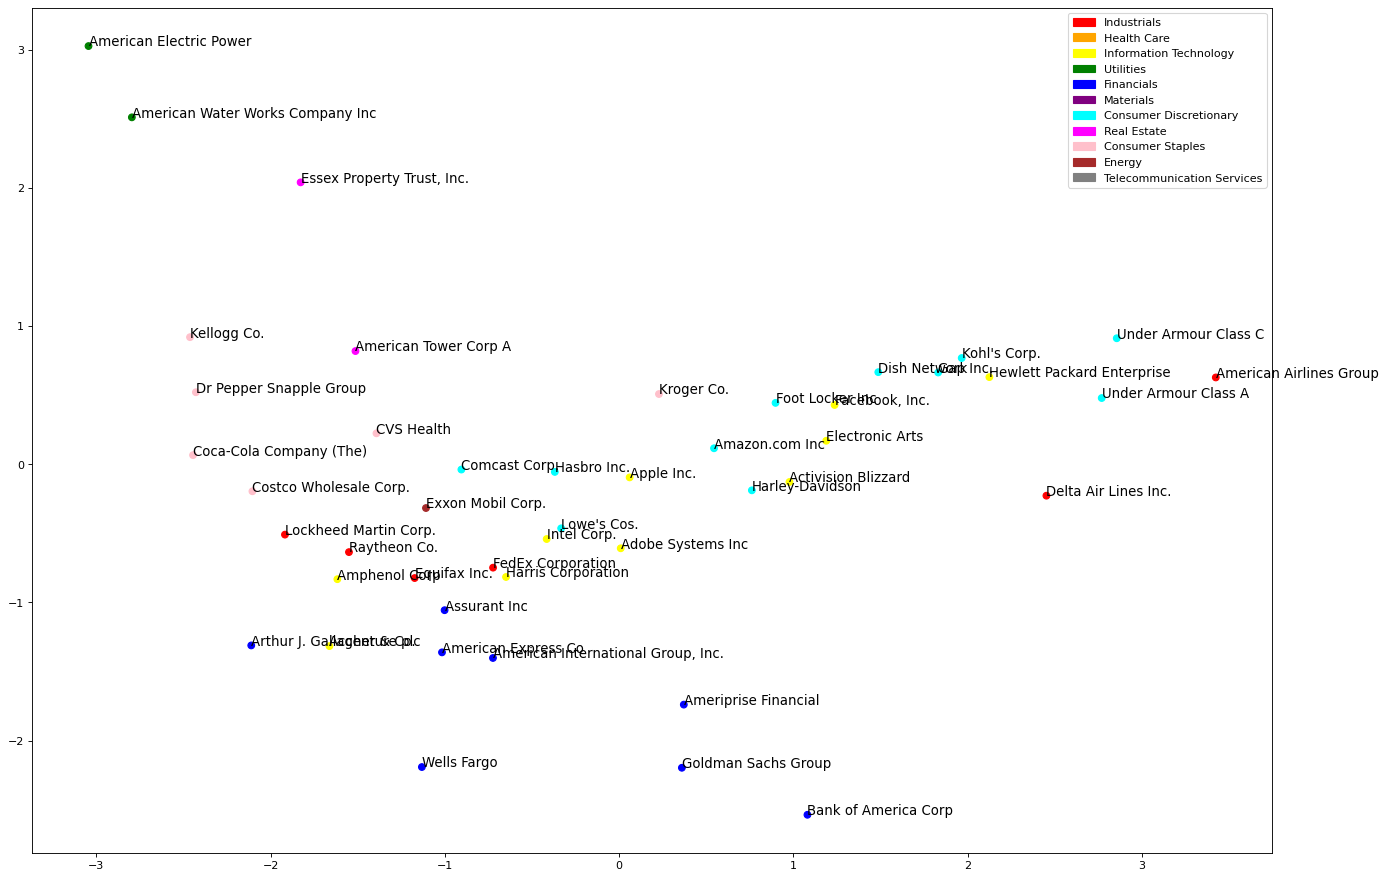

In [45]:

sectors = ['Industrials' ,'Health Care' ,'Information Technology' ,'Utilities','Financials','Materials', 
                     'Consumer Discretionary','Real Estate', 'Consumer Staples','Energy',
                     'Telecommunication Services']

newResultX = []
newResultY = []
newWords = list()
newWordToken = ""
with open('../notebooks/content/stocks.txt') as stockFile:
    contents = stockFile.read()
    for i in range(0,505):
        newWordToken = "%" + words[i] + "%"
        if newWordToken in contents:
            newWords.append(words[i])
            newResultX.append(result[i,0])
            newResultY.append(result[i,1])
#Increase Size of Figure
pyplot.figure(num=None, figsize=(20, 14), dpi=80, facecolor='w', edgecolor='k')
#Colors
sector_color_dict = {'Industrials':'red','Health Care':'orange','Information Technology':'yellow','Utilities':'green',
                     'Financials':'blue','Materials':'purple','Consumer Discretionary':'cyan','Real Estate':'magenta',
                     'Consumer Staples':'pink','Energy':'brown','Telecommunication Services':'gray'}
cvec = [sector_color_dict[companies_sector[word]] for word in newWords]

# create a scatter plot of the projection
pyplot.scatter(newResultX[:], newResultY[:], c = cvec)
#Names the Labels
for i, word in enumerate(newWords):
    pyplot.annotate(companies_names[word], xy=(newResultX[i], newResultY[i]), fontsize = 12)
#Legend
red_patch=mpatches.Patch(color='red', label='Industrials')
orange_patch=mpatches.Patch(color='orange', label='Health Care')
yellow_patch=mpatches.Patch(color='yellow', label='Information Technology')
green_patch=mpatches.Patch(color='green', label='Utilities')
blue_patch=mpatches.Patch(color='blue', label='Financials')
purple_patch=mpatches.Patch(color='purple', label='Materials')
cyan_patch=mpatches.Patch(color='cyan', label='Consumer Discretionary')
magenta_patch=mpatches.Patch(color='magenta', label='Real Estate')
pink_patch=mpatches.Patch(color='pink', label='Consumer Staples')
brown_patch=mpatches.Patch(color='brown', label='Energy')
gray_patch=mpatches.Patch(color='gray', label='Telecommunication Services')
pyplot.legend(handles=[red_patch,orange_patch,yellow_patch,green_patch,blue_patch,purple_patch,cyan_patch,magenta_patch,
                       pink_patch,brown_patch,gray_patch],loc='best')
pyplot.show()


In [46]:
pca.fit(X)
eigen_vecs = pca.components_
eigen_vals = pca.explained_variance_
print(eigen_vals)
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

print('Matrix W:\n', w)

[2.8753223e+00 1.5394263e+00 5.6766558e-01 1.0537745e-03]
Matrix W:
 [[-0.14098224  0.41465133]
 [ 0.6392536  -0.16388041]
 [ 0.45818532  0.82179624]
 [ 0.6012862  -0.35476518]]


In [47]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[2.8753223e+00 1.5394263e+00 5.6766558e-01 1.0537745e-03]
[5.76972187e-01 3.08906645e-01 1.13909744e-01 2.11454055e-04]
[0.5769722 0.8858788 0.9997885 1.       ]


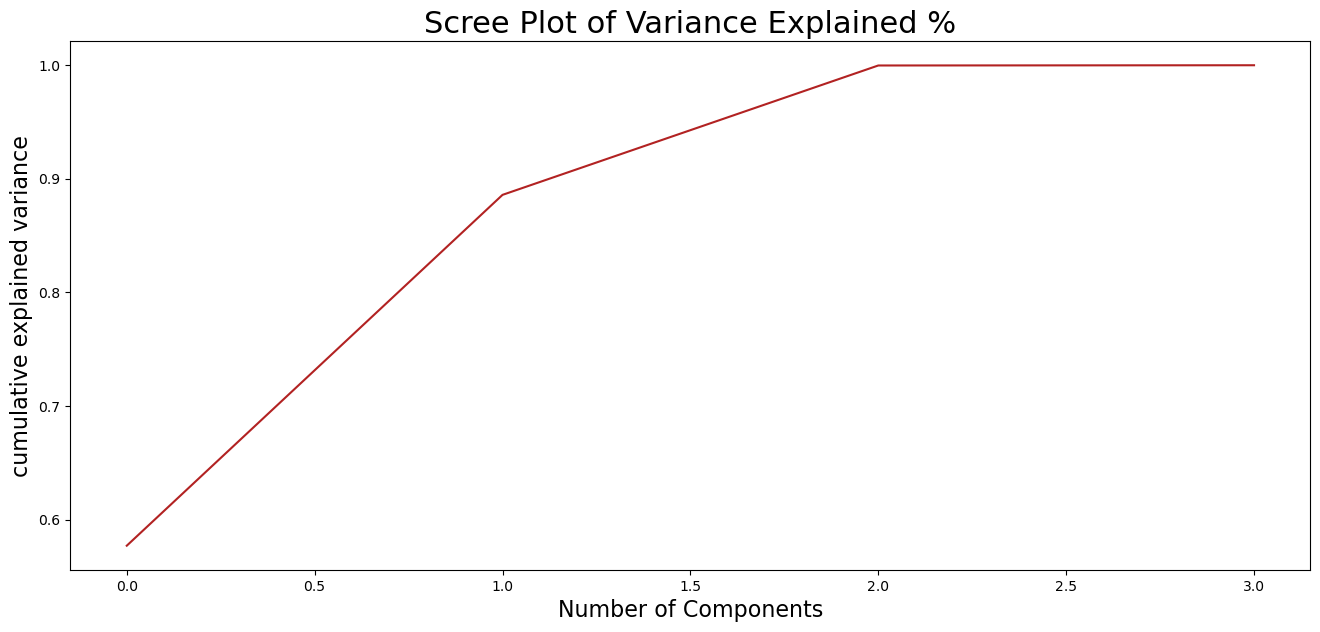

In [48]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum()
fig, axes = pyplot.subplots(1,1,figsize=(16,7), dpi=100)
pyplot.plot(variance_exp_cumsum, color='firebrick')
pyplot.title('Scree Plot of Variance Explained %', fontsize=22)
pyplot.xlabel('Number of Components', fontsize=16)
pyplot.ylabel('cumulative explained variance', fontsize=16)
pyplot.show()

In [49]:
top_similar = model.similar_by_word(target_symb, topn=5)
top_similar

[('REGN', 0.999580442905426),
 ('VRTX', 0.9981701374053955),
 ('AAL', 0.9980131387710571),
 ('INCY', 0.9956216812133789),
 ('NFLX', 0.993572473526001)]

In [50]:
dimensions = []
similars = []
data = {}
positions = ["first", "second", "third", "fourth"]
index = 0
for similar in top_similar:
  symb = similar[0]
  name = companies_names[symb]
  dimensions.append(symb)
  #similar = companies_sector[symb]
  similar = similar[1]
  similars.append(similar)
  data[symb] = word_dict[symb][0:4]
  data["position"] = positions
  index += 1

In [51]:
pd.DataFrame.from_dict(data)

,REGN,position,VRTX,AAL,INCY,NFLX
0,0.009123,first,0.027548,-0.111224,0.273551,0.202287
1,-0.387086,second,-0.046728,-0.266225,-0.215670,-0.047074
2,-1.682103,third,-1.826015,-1.761312,-1.731305,-1.473354
3,3.862672,fourth,3.859048,3.510448,4.957793,2.666324


In [52]:
df = pd.DataFrame.from_dict(data)
features = dimensions

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="position"
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [53]:
pca = PCA()
components = pca.fit_transform(X)
#pca = PCA(n_components=4)

#result = pca.fit_transform(X)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=words
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [54]:
pca = PCA()
components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=words,
    height=800,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [55]:
pca = PCA()
components = pca.fit_transform(X)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

fig =px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "Number of Components", "y": "Cumulative Explained Variance"}
)
fig.update_xaxes(title_font=dict(size=18, family='Courier', color='crimson'),showgrid=False)
fig.update_yaxes(title_font=dict(size=18, family='Courier', color='crimson'),showgrid=False)
fig.update_layout( title={'text':"Scree Plot of Variance Explained %",
                         'y':0.95,
                         'yanchor': 'top',
                         'x':0.5,
                         'xanchor': 'center'})
fig.show()

In [56]:
dimensions = []
similars = []
data = {}
positions = ["first", "second", "third", "fourth"]
index = 0
for similar in top_similar:
  symb = similar[0]
  name = companies_names[symb]
  dimensions.append(symb)
  #similar = companies_sector[symb]
  similar = similar[1]
  similars.append(similar)
  data[symb] = word_dict[symb][0:4]
  data["position"] = positions
  index += 1

In [57]:
full_data = desc_df

In [58]:
sector_color_dict = {'Industrials':'red','Health Care':'orange','Information Technology':'yellow','Utilities':'green',
                     'Financials':'blue','Materials':'purple','Consumer Discretionary':'cyan','Real Estate':'magenta',
                     'Consumer Staples':'pink','Energy':'brown','Telecommunication Services':'gray'}

In [59]:
full_data

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology
...,...,...,...
500,XYL,Xylem Inc.,Industrials
501,YUM,Yum! Brands Inc,Consumer Discretionary
502,ZBH,Zimmer Biomet Holdings,Health Care
503,ZION,Zions Bancorp,Financials


In [61]:
stocks_df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [62]:
grouped = stocks_df.groupby("Name", as_index=False)
stocks_df2 = grouped.mean()
stocks_df2["change"] = 0.0
for symbol, op, cl, in stocks_df2[['Name','open', 'close']].values:
    index = stocks_df2[stocks_df2.Name == symbol].index[0]
    stocks_df2["change"][index] = (cl - op)/op
stocks_df2

<ipython-input-62-72c7928853a0>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,open,high,low,close,volume,change
0,A,49.187863,49.600059,48.782026,49.202025,2.338039e+06,0.000288
1,AAL,38.390495,38.955554,37.825605,38.393252,9.390321e+06,0.000072
2,AAP,132.439631,133.818297,131.036025,132.433463,1.078043e+06,-0.000047
3,AAPL,109.055429,109.951118,108.141589,109.066698,5.404790e+07,0.000103
4,ABBV,60.802801,61.474133,60.177275,60.864440,7.870683e+06,0.001014
...,...,...,...,...,...,...,...
500,XYL,41.415473,41.763885,41.076026,41.434095,1.183141e+06,0.000450
501,YUM,75.422099,76.027123,74.844914,75.451009,3.209032e+06,0.000383
502,ZBH,105.542014,106.419854,104.698038,105.606291,1.297144e+06,0.000609
503,ZION,32.161477,32.509290,31.802241,32.171790,2.621178e+06,0.000321


In [65]:
full_data = desc_df

full_data["Vector1"] = 0.0
full_data["Vector2"] = 0.0
full_data["Vector3"] = 0.0
full_data["Vector4"] = 0.0
full_data["Sector_Color"] = ""

#for index, word in enumerate(words):
for word in words:
    row_word = word_dict[word]
    index = full_data[full_data.Symbol == word].index[0]
    sector = full_data.iloc[index,2]
    full_data['Vector1'][index] = round(row_word[0],4)
    full_data['Vector2'][index] = round(row_word[1],4)
    full_data['Vector3'][index] = round(row_word[2],4)
    full_data['Vector4'][index] = round(row_word[3],4)
    full_data["Sector_Color"][index] = sector_color_dict[sector]

<ipython-input-65-53951f665649>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-53951f665649>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-53951f665649>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-53951f665649>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [603]:
full_data.dtypes

Symbol           object
Name             object
Sector           object
Vector1         float64
Vector2         float64
Vector3         float64
Vector4         float64
Sector_Color     object
dtype: object

In [66]:
full_data.head()

,Symbol,Name,Sector,Vector1,Vector2,Vector3,Vector4,Sector_Color
0,MMM,3M Company,Industrials,0.3047,-1.1492,-0.3533,-2.8370,red
1,AOS,A.O. Smith Corp,Industrials,-0.2140,-0.4369,-1.2729,-0.7849,red
2,ABT,Abbott Laboratories,Health Care,0.1297,-1.1131,-0.6357,-1.0210,orange
3,ABBV,AbbVie Inc.,Health Care,0.1802,-1.1673,-0.7491,1.0102,orange
4,ACN,Accenture plc,Information Technology,0.2285,-0.4749,-0.7828,-2.1630,yellow


In [82]:
stocks_df_vector = full_data[["Symbol", "Vector1", "Vector2", "Vector3", "Vector4"]]
stocks_df_vector

,Symbol,Vector1,Vector2,Vector3,Vector4
0,MMM,0.3047,-1.1492,-0.3533,-2.8370
1,AOS,-0.2140,-0.4369,-1.2729,-0.7849
2,ABT,0.1297,-1.1131,-0.6357,-1.0210
3,ABBV,0.1802,-1.1673,-0.7491,1.0102
4,ACN,0.2285,-0.4749,-0.7828,-2.1630
...,...,...,...,...,...
500,XYL,0.1740,-0.2190,-1.0229,-0.6488
501,YUM,0.2349,-1.1265,-0.5574,-0.6951
502,ZBH,-0.0466,-1.1366,-0.7960,-1.0415
503,ZION,-0.6403,1.7668,-2.7968,-0.0854


In [83]:
columns = ['Symbol', 'open', 'high', 'low', 'close', 'volume', 'change']
stocks_df2.columns = columns

In [84]:
stocks_df2

,Symbol,open,high,low,close,volume,change
0,A,49.187863,49.600059,48.782026,49.202025,2.338039e+06,0.000288
1,AAL,38.390495,38.955554,37.825605,38.393252,9.390321e+06,0.000072
2,AAP,132.439631,133.818297,131.036025,132.433463,1.078043e+06,-0.000047
3,AAPL,109.055429,109.951118,108.141589,109.066698,5.404790e+07,0.000103
4,ABBV,60.802801,61.474133,60.177275,60.864440,7.870683e+06,0.001014
...,...,...,...,...,...,...,...
500,XYL,41.415473,41.763885,41.076026,41.434095,1.183141e+06,0.000450
501,YUM,75.422099,76.027123,74.844914,75.451009,3.209032e+06,0.000383
502,ZBH,105.542014,106.419854,104.698038,105.606291,1.297144e+06,0.000609
503,ZION,32.161477,32.509290,31.802241,32.171790,2.621178e+06,0.000321


In [86]:
stocks_df_vector

,Symbol,Vector1,Vector2,Vector3,Vector4
0,MMM,0.3047,-1.1492,-0.3533,-2.8370
1,AOS,-0.2140,-0.4369,-1.2729,-0.7849
2,ABT,0.1297,-1.1131,-0.6357,-1.0210
3,ABBV,0.1802,-1.1673,-0.7491,1.0102
4,ACN,0.2285,-0.4749,-0.7828,-2.1630
...,...,...,...,...,...
500,XYL,0.1740,-0.2190,-1.0229,-0.6488
501,YUM,0.2349,-1.1265,-0.5574,-0.6951
502,ZBH,-0.0466,-1.1366,-0.7960,-1.0415
503,ZION,-0.6403,1.7668,-2.7968,-0.0854


In [88]:
stocks_df_vectors = pd.merge(stocks_df2, stocks_df_vector, on="Symbol")

In [90]:
stocks_df_vectors.to_csv('../notebooks/content/stocks_df_vectors.csv', index=False)
stocks_df2.to_csv('../notebooks/content/stocks_df2.csv', index=False)

In [459]:
target_symb = 'ALXN'

#print('Symbol:%s\tName:%s\tSector: %s'%(target_symb, companies_names[target_symb], companies_sector[target_symb]))
top_similars = model.similar_by_word(target_symb, topn=20)
#top_similar = model.similar_by_vector(target_symb, topn=20)
print('Most Similar')
similars = []
for similar in top_similars:
    symb = similar[0]
    similars.append(symb)
    name = companies_names[symb]
    sect = companies_sector[symb]
    #print('Symbol: %s\tName: %s\t\t\tSector: %s'%(symb, name, sect))

Most Similar


In [605]:
def top_similars(symbol, top_number):
    similars = []
    top_similars = model.similar_by_word(symbol, topn=top_number)
    for similar in top_similars:
        #symb = similar[0]
        similars.append(similar[0])
    return similars

In [681]:
def top_similars_by_symbols(symbols, top_number):
    similars = []
    top_similars = model.most_similar(symbols, topn=top_number)
    for similar in top_similars:
        #symb = similar[0]
        similars.append(similar[0])
    return similars

In [606]:
similar_companies = full_data[full_data['Symbol'].isin(top_similars('ALXN', 20))]
similar_companies

,Symbol,Name,Sector,Vector1,Vector2,Vector3,Vector4,Sector_Color
17,ALK,Alaska Air Group Inc,Industrials,-2.4104,0.9645,1.4879,0.0189,red
23,AGN,"Allergan, Plc",Health Care,-1.7822,1.0603,0.9580,-0.0743,orange
32,AAL,American Airlines Group,Industrials,-2.9157,1.3464,2.3513,0.2092,red
72,BIIB,Biogen Inc.,Health Care,-2.2454,0.9176,1.3235,-0.0556,orange
96,CELG,Celgene Corp.,Health Care,-1.9421,1.1830,1.1876,-0.0027,orange
97,CNC,Centene Corporation,Health Care,-1.9372,1.0164,1.3054,-0.0930,orange
137,DHI,D. R. Horton,Consumer Discretionary,-1.5095,1.0446,1.3221,-0.2562,cyan
244,ILMN,Illumina Inc,Health Care,-2.3383,1.3651,1.4638,0.1760,orange
245,INCY,Incyte,Health Care,-2.8345,2.6315,3.1634,0.5880,orange
280,LEN,Lennar Corp.,Consumer Discretionary,-1.6195,0.9887,1.1978,-0.2106,cyan


In [607]:
full_data.dtypes

Symbol           object
Name             object
Sector           object
Vector1         float64
Vector2         float64
Vector3         float64
Vector4         float64
Sector_Color     object
dtype: object

In [608]:
company_name = full_data[full_data.Symbol == "ALXN"]
company_name.iloc[0,1]

'Alexion Pharmaceuticals'

In [663]:
similar_companies = full_data[full_data['Symbol'].isin(top_similars('AAPL', 20))]
df = similar_companies
company_name = full_data[full_data.Symbol == "AAPL"].iloc[0,1]
fig = px.scatter(df, x=df.Vector1, 
                 y=df.Vector2, 
                 color=df.Sector, 
                 text=df.Name,
                 size=abs(df.Vector3.astype(float)))

fig.update_traces(textposition='top center', textfont_size=8)
#fig.update_traces(texttemplate='%{text:.2s}', textposition='top center')
fig.update_xaxes(title_font=dict(size=18, family='Courier', color='crimson'),showgrid=False)
fig.update_yaxes(title_font=dict(size=18, family='Courier', color='crimson'),showgrid=False)
fig.update_layout( title={'text':f"Top 20 Similar Companies to {company_name}",
                         'y':0.95,
                         'yanchor': 'top',
                         'x':0.4,
                         'xanchor': 'center'})
fig.update_layout(
    legend=dict(
        #traceorder="reversed",
        #title_font_family="Times New Roman",
        font=dict(
            family="Courier",
            size=12,
            color="black"
        ),
        #bgcolor="LightSteelBlue",
        #bordercolor="Black",
        #borderwidth=1
    )
)


fig.show()

In [660]:
def similar_to_company(symbol, top_number):
    similar_companies = full_data[full_data['Symbol'].isin(top_similars(symbol, top_number))]
    df = similar_companies
    company_name = full_data[full_data.Symbol == symbol].iloc[0,1]
    fig = px.scatter(df, x=df.Vector1, 
                     y=df.Vector2, 
                     color=df.Sector, 
                     text=df.Name,
                     size=abs(df.Vector3.astype(float)))

    fig.update_traces(textposition='top center', textfont_size=8)
    #fig.update_traces(texttemplate='%{text:.2s}', textposition='top center')
    fig.update_xaxes(title_font=dict(size=18, family='Courier', color='crimson'),showgrid=False)
    fig.update_yaxes(title_font=dict(size=18, family='Courier', color='crimson'),showgrid=False)
    fig.update_layout( title={'text':f"Top {top_number} Similar Companies to {company_name}",
                             'y':0.95,
                             'yanchor': 'top',
                             'x':0.4,
                             'xanchor': 'center'})
    fig.update_layout(
        legend=dict(
            #traceorder="reversed",
            #title_font_family="Times New Roman",
            font=dict(
                family="Courier",
                size=12,
                color="black"
            ),
            #bgcolor="LightSteelBlue",
            #bordercolor="Black",
            #borderwidth=1
        )
    )
    fig.show()

In [673]:
top_ten_symbols = ['AAPL', 'MSFT', 'AMZN', 'FB', 'GOOGL', 'GOOG', 'BRK.B', 'JNJ', 'V', 'PG']

In [697]:
similar_to_company("AMZN", 10)

In [674]:
model.most_similar_to_given("INCY", top_ten_symbols)

'FB'

In [691]:
def most_similars(symbols, top_number):
    similar_companies = full_data[full_data['Symbol'].isin(top_similars_by_symbols(symbols, top_number))]
    df = similar_companies
    #company_name = full_data[full_data.Symbol == symbol].iloc[0,1]
    fig = px.scatter(df, x=df.Vector1, 
                     y=df.Vector2, 
                     color=df.Sector, 
                     text=df.Name,
                     size=abs(df.Vector3.astype(float)))

    fig.update_traces(textposition='top center', textfont_size=8)
    #fig.update_traces(texttemplate='%{text:.2s}', textposition='top center')
    fig.update_xaxes(title_font=dict(size=18, family='Courier', color='crimson'),showgrid=False)
    fig.update_yaxes(title_font=dict(size=18, family='Courier', color='crimson'),showgrid=False)
    fig.update_layout( title={'text':f"Companes similar to Top {top_number} S&P Companies",
                             'y':0.95,
                             'yanchor': 'top',
                             'x':0.4,
                             'xanchor': 'center'})
    fig.update_layout(
        legend=dict(
            #traceorder="reversed",
            #title_font_family="Times New Roman",
            font=dict(
                family="Courier",
                size=12,
                color="black"
            ),
            #bgcolor="LightSteelBlue",
            #bordercolor="Black",
            #borderwidth=1
        )
    )
    fig.show()

In [676]:
model.most_similar(top_ten_symbols)

[('ICE', 0.9943976998329163),
 ('IT', 0.9914363622665405),
 ('YUM', 0.9874942302703857),
 ('UNH', 0.9693443179130554),
 ('MTD', 0.9680495262145996),
 ('SBUX', 0.9675626754760742),
 ('ABT', 0.9645333290100098),
 ('BA', 0.9627834558486938),
 ('NDAQ', 0.960785984992981),
 ('ANSS', 0.9605118036270142)]

In [694]:
most_similars_list = top_similars_by_symbols(top_ten_symbols, 10)
most_similars(most_similars_list, 10)

In [679]:
model.most_similar(top_ten_symbols, topn=10)

[('ICE', 0.9943976998329163),
 ('IT', 0.9914363622665405),
 ('YUM', 0.9874942302703857),
 ('UNH', 0.9693443179130554),
 ('MTD', 0.9680495262145996),
 ('SBUX', 0.9675626754760742),
 ('ABT', 0.9645333290100098),
 ('BA', 0.9627834558486938),
 ('NDAQ', 0.960785984992981),
 ('ANSS', 0.9605118036270142)]

In [ ]:
pca = PCA()
components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=words,
    height=800,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [1]:
full_data

NameError: name 'full_data' is not defined